In [1]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import cv2
import numpy as np
import pandas as pd
import h5py
from scipy.ndimage.filters import gaussian_filter
from matplotlib import cm as CM
from tqdm import tqdm
import json
import os
import glob
import scipy

In [2]:
PATH_DATA = "../birdeye/data/TownCentre-groundtruth.top"
data = pd.read_csv(PATH_DATA)
data.columns = ['numPersona','numFrame','headValid','bodyValid','headLeft','headTop','headRight','headBottom','bodyLeft','bodyTop','bodyRight','bodyBottom']

In [3]:
# obtener imagenes para el entrenamiento
PATH_VIDEO = "../birdeye/data/TownCentreXVID.avi"
capture = cv2.VideoCapture(PATH_VIDEO)
START_FRAME = 2500
STOP_FRAME = 3500

prefix = None
i=0
pbar = tqdm(total = STOP_FRAME-START_FRAME)
while(capture.isOpened() and i < STOP_FRAME):
    ret, frame = capture.read()
    if ret == False:
        break
    
    if(i>=START_FRAME):
        if i%2 == 0:
            prefix = 'test'
        else:
            prefix = 'train'

        #img_path = "../dataset/towncenter/"+prefix+"_data/images/IMG_"+str(i)+".jpg"
        #cv2.imwrite(img_path, frame)
        
        frame_data = data[data['numFrame']==i]
        #img = plt.imread(img_path)
        #k = np.zeros((img.shape[0],img.shape[1]))
        frame_points = [(row['headLeft'] + (row['headRight'] - row['headLeft'])/2, row['headTop'] + (row['headBottom'] - row['headTop'])/2 ) for index, row in frame_data.iterrows()]
        gt = np.array(frame_points)
        
        scipy.io.savemat("../dataset/towncenter/"+prefix+"_data/ground-truth/GT_IMG_"+str(i)+".mat", dict(image_info=gt))
        
        #for j in range(0,len(gt)):
        #    if int(gt[j][1])<img.shape[0] and int(gt[j][0])<img.shape[1]:
        #        k[int(gt[j][1]),int(gt[j][0])]=1
        #k = gaussian_filter(k,15)     
        #with h5py.File("data/towncentre/"+prefix+"_data/ground-truth/IMG_"+str(i)+".h5", 'w') as hf:
        #    hf['density'] = k
        
        pbar.update(1)
    i+=1

pbar.close()
capture.release()

100%|██████████| 1000/1000 [00:12<00:00, 81.91it/s]


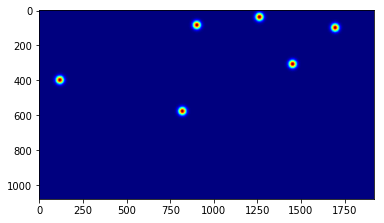

In [21]:
# mostramos un ejemplo generado
gt_file = h5py.File("data/towncentre/train_data/ground-truth/IMG_2901.h5",'r')
groundtruth = np.asarray(gt_file['density'])
plt.imshow(groundtruth,cmap=CM.jet)

In [27]:
# generamos los archivos json de lectura para el entrenamiento
img_paths_train = []
img_paths_val = []
#root = '/home/aalejo/proyectos/CSRNet-pytorch'
root = ''
path = os.path.join(root,"data/towncentre/train_data",'images')
c = 0
for img_path in glob.glob(os.path.join(path, '*.jpg')):
    if c>=350:
        img_paths_val.append(img_path)
    else:
        img_paths_train.append(img_path)
    c+=1

with open('towncentre_train.json', 'w') as f:
    json.dump(img_paths_train, f)    
    
with open('towncentre_val.json', 'w') as f:
    json.dump(img_paths_val, f)

In [28]:
# test
img_paths = []
#root = '/home/aalejo/proyectos/CSRNet-pytorch'
root = ''
path = os.path.join(root,"data/towncentre/test_data",'images')

for img_path in glob.glob(os.path.join(path, '*.jpg')):
    img_paths.append(img_path)

with open('towncentre_test.json', 'w') as f:
    json.dump(img_paths, f)